First let's load our data and do a little feature engineering. Some of our quantities are in object form, so let's find their float equivalents.

In [1]:
import pandas as pd

NVDA = '/kaggle/input/nvidia-stock-price-history2024/NVIDIA Stock Price History.csv'

df = pd.read_csv(filepath_or_buffer=NVDA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df['volume'] = df['Vol.'].apply(func=lambda x: 1e6 * float(x.replace('M', '')))
df['change (pct)'] = df['Change %'].apply(func=lambda x: float(x.replace('%', '')))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,year,volume,change (pct)
0,2024-12-12,136.91,137.06,137.53,135.81,67.31M,-1.72%,2024,67310000.0,-1.72
1,2024-12-11,139.31,137.36,140.17,135.21,184.91M,3.14%,2024,184910000.0,3.14
2,2024-12-10,135.07,139.01,141.82,133.79,210.02M,-2.69%,2024,210020000.0,-2.69
3,2024-12-09,138.81,138.97,139.95,137.13,189.31M,-2.55%,2024,189310000.0,-2.55
4,2024-12-06,142.44,144.60,145.70,141.31,188.51M,-1.81%,2024,188510000.0,-1.81


We almost always look at the price and volume correlations, so let's do that.

In [2]:
df[['Price', 'Open', 'High', 'Low', 'volume']].corr()

,Price,Open,High,Low,volume
Price,1.000000,0.816376,0.897553,0.918594,0.260582
Open,0.816376,1.000000,0.950579,0.877230,0.491047
High,0.897553,0.950579,1.000000,0.860287,0.516624
Low,0.918594,0.877230,0.860287,1.000000,0.115987
volume,0.260582,0.491047,0.516624,0.115987,1.000000


The fact that our interprice correlations are so low tells us right away that we don't have a lot of data, as over long periods of time our interprice correlations tend toward 1.0. How many rows of data do we have?

In [3]:
len(df)

22

Ah. We have about a month's data. Let's look at the series.

<Axes: xlabel='Date', ylabel='Price'>

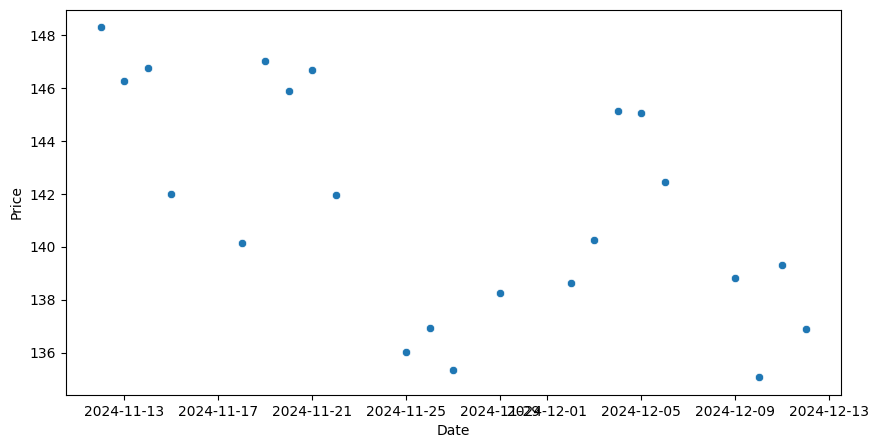

In [4]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE = (10, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Price')